In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
data = pd.read_csv('problems_we_tackle_data.csv')

In [3]:
data.head()

,SHIFT_ID,WORKER_ID,WORKPLACE_ID,SHIFT_START_AT,SHIFT_CREATED_AT,OFFER_VIEWED_AT,RATE,DURATION,SLOT,CLAIMED_AT,DELETED_AT,IS_VERIFIED,CANCELED_AT,IS_NCNS
0,66fabb7aaa2ce977d1aa5dd4,661ace49b44011b92cf09db6,5e84da485dd18c00164a3dd8,2024-09-30 15:45:00,2024-09-30 14:53:46,2024-09-30 15:02:12,25.27,6.00,am,NaN,NaN,False,NaN,False
1,66db26aa03d526ef25f476c7,6306a1090d8b6801b5c1b085,6116cd18780dfd0166de344a,2024-10-01 18:30:00,2024-09-06 15:58:34,2024-09-14 15:27:38,22.26,7.50,pm,NaN,2024-09-20 16:30:45,False,NaN,False
2,66fa173b1141258d42209761,65a0006427861cb389880afc,6435ce45c242c401bbc57725,2024-09-30 14:00:00,2024-09-30 3:12:59,2024-09-30 4:21:46,21.61,8.00,am,NaN,NaN,False,NaN,False
3,66f5e216d4d0fab6c061d96d,625ded8968ff6601ae52feba,61ba8d2175864101857ebe11,2024-09-29 22:00:00,2024-09-26 22:37:11,2024-09-27 20:18:04,18.40,8.00,pm,NaN,NaN,False,NaN,False
4,66f3149ed396a4a052aa7a2e,66c91ae293d8c271684b6bc3,5c802b094ea5960016c6ef53,2024-10-02 22:00:00,2024-09-24 19:35:59,2024-10-02 18:01:45,26.90,7.59,pm,NaN,NaN,False,NaN,False


In [4]:
data.describe()

,RATE,DURATION
count,50000.000000,50000.000000
mean,21.117677,6.530966
std,2.966647,2.120310
min,15.640000,0.000000
25%,19.200000,6.950000
50%,20.930000,7.500000
75%,22.190000,7.520000
max,61.520000,15.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SHIFT_ID          50000 non-null  object 
 1   WORKER_ID         50000 non-null  object 
 2   WORKPLACE_ID      50000 non-null  object 
 3   SHIFT_START_AT    50000 non-null  object 
 4   SHIFT_CREATED_AT  50000 non-null  object 
 5   OFFER_VIEWED_AT   50000 non-null  object 
 6   RATE              50000 non-null  float64
 7   DURATION          50000 non-null  float64
 8   SLOT              50000 non-null  object 
 9   CLAIMED_AT        811 non-null    object 
 10  DELETED_AT        15062 non-null  object 
 11  IS_VERIFIED       50000 non-null  bool   
 12  CANCELED_AT       136 non-null    object 
 13  IS_NCNS           50000 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 4.7+ MB


In [6]:
data.describe(include='all')

,SHIFT_ID,WORKER_ID,WORKPLACE_ID,SHIFT_START_AT,SHIFT_CREATED_AT,OFFER_VIEWED_AT,RATE,DURATION,SLOT,CLAIMED_AT,DELETED_AT,IS_VERIFIED,CANCELED_AT,IS_NCNS
count,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000,811,15062,50000,136,50000
unique,3356,5125,158,352,2753,46646,NaN,NaN,3,810,960,2,136,2
top,66d9f7304a2318de6b5c7ced,650cd680be202a3a2ea3c62b,5c4fc84d774ed70016dfcb1b,2024-09-29 11:00:00,2024-08-21 12:50:15,2024-09-17 4:21:30,NaN,NaN,am,2024-09-27 1:07:30,2024-09-27 21:32:59,False,2024-10-01 4:02:22,False
freq,228,169,3937,1815,290,7,NaN,NaN,20709,2,169,49527,1,49988
mean,NaN,NaN,NaN,NaN,NaN,NaN,21.117677,6.530966,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.966647,2.120310,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,15.640000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,19.200000,6.950000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,20.930000,7.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,22.190000,7.520000,NaN,NaN,NaN,NaN,NaN,NaN


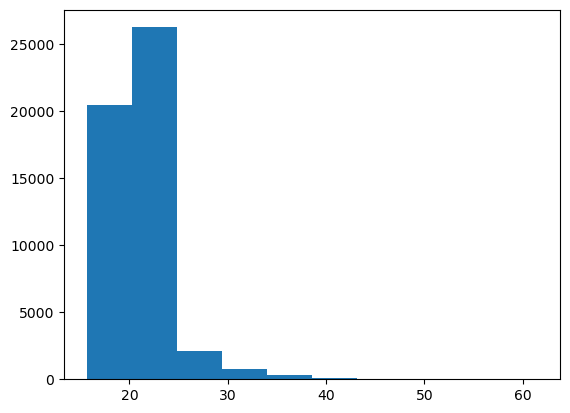

In [7]:
plt.hist(data['RATE']);

In [8]:
# Convert datetime columns
date_cols = ['SHIFT_START_AT', 'SHIFT_CREATED_AT', 'OFFER_VIEWED_AT', 'CLAIMED_AT', 'DELETED_AT', 'CANCELED_AT']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Check the null counts again after conversion
print(data[date_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SHIFT_START_AT    50000 non-null  datetime64[ns]
 1   SHIFT_CREATED_AT  50000 non-null  datetime64[ns]
 2   OFFER_VIEWED_AT   50000 non-null  datetime64[ns]
 3   CLAIMED_AT        811 non-null    datetime64[ns]
 4   DELETED_AT        15062 non-null  datetime64[ns]
 5   CANCELED_AT       136 non-null    datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 2.3 MB
None


In [9]:
# Calculate missing value percentages
missing_data = data[['CLAIMED_AT', 'DELETED_AT', 'CANCELED_AT']].isnull().mean() * 100
print("Percentage of missing values:")
print(missing_data)

Percentage of missing values:
CLAIMED_AT     98.378
DELETED_AT     69.876
CANCELED_AT    99.728
dtype: float64


In [10]:
# Analyze unclaimed shifts
unclaimed = data[data['CLAIMED_AT'].isnull()]
print("Unclaimed Shifts Summary:")
print(unclaimed[['RATE', 'DURATION', 'SLOT']].describe())

Unclaimed Shifts Summary:
               RATE      DURATION
count  49189.000000  49189.000000
mean      21.069145      6.534663
std        2.871667      2.116842
min       15.640000      0.000000
25%       19.190000      6.950000
50%       20.900000      7.500000
75%       22.160000      7.520000
max       61.520000     15.500000


In [11]:
# Analyze deleted shifts
deleted = data[~data['DELETED_AT'].isnull()]
print("Deleted Shifts Summary:")
print(deleted[['RATE', 'DURATION', 'SLOT']].describe())

Deleted Shifts Summary:
               RATE      DURATION
count  15062.000000  15062.000000
mean      20.895689      4.744139
std        2.180010      2.894803
min       15.640000      0.000000
25%       19.570000      2.000000
50%       21.020000      6.000000
75%       21.960000      7.500000
max       49.270000     15.500000


In [12]:
# Analyze cancellations
canceled = data[~data['CANCELED_AT'].isnull()]
print("Canceled Shifts Summary:")
print(canceled[['RATE', 'DURATION', 'SLOT']].describe())

Canceled Shifts Summary:
             RATE    DURATION
count  136.000000  136.000000
mean    23.114779    6.349779
std      5.232311    2.180734
min     17.040000    0.500000
25%     20.325000    6.225000
50%     22.025000    7.480000
75%     23.095000    7.570000
max     47.690000    9.340000


# Broad take aways from null values: 
Higher rates don’t always ensure a shift is worked (e.g., unclaimed shifts at $61/hour and cancellations at $47/hour).
Shorter durations (4.74 hours for deleted shifts) correlate with higher removal by workplaces.
Workplaces remove shifts with lower pay and shorter durations.
Workers cancel shifts even with high pay, but these shifts may align poorly with their preferences or schedules.
Null values are needed to be filled as the represent meaningful information (unclaimed shift, deleted shift, or canceled shift).
# Issue
Zero Duration shifts??? (in deleted and unclaimed shifts)
$61 hourly rate is significant outlier. Why?

In [13]:
# Filter unclaimed shifts
unclaimed = data[data['CLAIMED_AT'].isnull()]

# Analyze unclaimed shifts by SLOT
unclaimed_slot_analysis = unclaimed['SLOT'].value_counts()

# Analyze unclaimed shifts by WORKPLACE_ID
unclaimed_workplace_analysis = unclaimed['WORKPLACE_ID'].value_counts().head(10)  # Top 10 workplaces

# Identify zero-duration shifts
zero_duration_unclaimed = unclaimed[unclaimed['DURATION'] == 0]

print("Unclaimed Shifts by SLOT:")
print(unclaimed_slot_analysis)

print("\nTop 10 Workplaces with Most Unclaimed Shifts:")
print(unclaimed_workplace_analysis)

print("\nZero-Duration Unclaimed Shifts:")
print(zero_duration_unclaimed)

Unclaimed Shifts by SLOT:
SLOT
am     20392
pm     19361
noc     9436
Name: count, dtype: int64

Top 10 Workplaces with Most Unclaimed Shifts:
WORKPLACE_ID
5c4fc84d774ed70016dfcb1b    3895
6449650dbc29b301bf08c98f    2440
6434a3fc05766e01baed1853    2252
61ba8d2175864101857ebe11    2179
6058de755ad75600168a3ae7    2142
5c802b094ea5960016c6ef53    1636
6488c476807a2a01b8de4bc4    1412
61e5e95b3f8215018a95b41d    1368
626ac7b1596c0601c2c33c57    1317
6116cd18780dfd0166de344a    1278
Name: count, dtype: int64

Zero-Duration Unclaimed Shifts:
                       SHIFT_ID                 WORKER_ID  \
20     66f24460b652f0becc365361  64ecd6a13aa6333ac67ed305   
74     66fce01a86cd008f19426999  6662893d53f8a9d7f3dd0664   
125    66f244533395e3b2006a2920  62a24ea258bcef179f3598ea   
130    66f59281e6f77cf061b99740  6389669b3c13855470e79954   
179    66f24460b652f0becc365361  6138720b298f5701667ad5c1   
...                         ...                       ...   
49765  66f24476b652f0becc365

In [14]:
# Total shifts by SLOT
total_shifts_per_slot = data['SLOT'].value_counts()

# Unclaimed shifts by SLOT
unclaimed_shifts_per_slot = unclaimed['SLOT'].value_counts()

# Calculate percentage of unclaimed shifts per slot
unclaimed_percentage_per_slot = (unclaimed_shifts_per_slot / total_shifts_per_slot) * 100

# Combine into a DataFrame for better readability
slot_analysis = pd.DataFrame({
    'Total Shifts': total_shifts_per_slot,
    'Unclaimed Shifts': unclaimed_shifts_per_slot,
    'Unclaimed Percentage': unclaimed_percentage_per_slot
})

print("Percentage of Unclaimed Shifts by SLOT:")
print(slot_analysis)

Percentage of Unclaimed Shifts by SLOT:
      Total Shifts  Unclaimed Shifts  Unclaimed Percentage
SLOT                                                      
am           20709             20392             98.469265
pm           19638             19361             98.589469
noc           9653              9436             97.751994


# Huge percentage of unclaimed shifts. Seems like the top priority to improve the marketplace.

In [15]:
# Top 10 workplaces with most unclaimed shifts
top_unclaimed_workplaces = unclaimed['WORKPLACE_ID'].value_counts().head(10)

# Calculate mean pay rate and duration for shifts in these workplaces
workplace_stats = unclaimed[unclaimed['WORKPLACE_ID'].isin(top_unclaimed_workplaces.index)].groupby('WORKPLACE_ID')[['RATE', 'DURATION']].mean()

# Combine counts and stats into a single DataFrame
workplace_unclaimed_summary = pd.DataFrame({
    'Unclaimed Count': top_unclaimed_workplaces
}).merge(workplace_stats, left_index=True, right_index=True)

print("Top 10 Workplaces with Most Unclaimed Shifts (Counts, Avg Rate, Avg Duration):")
print(workplace_unclaimed_summary)

Top 10 Workplaces with Most Unclaimed Shifts (Counts, Avg Rate, Avg Duration):
                          Unclaimed Count       RATE  DURATION
WORKPLACE_ID                                                  
5c4fc84d774ed70016dfcb1b             3895  20.530668  6.103979
6449650dbc29b301bf08c98f             2440  18.518992  6.964398
6434a3fc05766e01baed1853             2252  20.982469  4.931541
61ba8d2175864101857ebe11             2179  18.363171  7.759330
6058de755ad75600168a3ae7             2142  22.445588  6.050705
5c802b094ea5960016c6ef53             1636  19.520782  7.042066
6488c476807a2a01b8de4bc4             1412  21.558555  5.545156
61e5e95b3f8215018a95b41d             1368  23.193567  6.670563
626ac7b1596c0601c2c33c57             1317  17.808512  6.894905
6116cd18780dfd0166de344a             1278  22.637582  6.851041


In [16]:
# Total zero-duration unclaimed shifts
total_zero_duration = len(zero_duration_unclaimed)

# Zero-duration shifts by workplace
zero_duration_workplace_counts = zero_duration_unclaimed['WORKPLACE_ID'].value_counts()

# Zero-duration shifts by SLOT
zero_duration_slot_counts = zero_duration_unclaimed['SLOT'].value_counts()

print(f"Total Zero-Duration Unclaimed Shifts: {total_zero_duration}")
print("\nZero-Duration Shifts by WORKPLACE_ID:")
print(zero_duration_workplace_counts)
print("\nZero-Duration Shifts by SLOT:")
print(zero_duration_slot_counts)

Total Zero-Duration Unclaimed Shifts: 1022

Zero-Duration Shifts by WORKPLACE_ID:
WORKPLACE_ID
6434a3fc05766e01baed1853    767
5e726e69759cf60016d8f943    144
5c82e4eda08cb80016739ff9    103
62cf6327b2d5f501bc3921b6      8
Name: count, dtype: int64

Zero-Duration Shifts by SLOT:
SLOT
pm     501
am     421
noc    100
Name: count, dtype: int64


We can deduct that the 0 duration datum 

In [17]:
# Group data by SLOT and calculate summary statistics for RATE and DURATION
slot_rate_duration_stats = data.groupby('SLOT')[['RATE', 'DURATION']].agg(['mean', 'median', 'min', 'max', 'std'])

print("Pay Rate and Duration Statistics by Time Slot:")
print(slot_rate_duration_stats)

Pay Rate and Duration Statistics by Time Slot:
           RATE                                 DURATION                     \
           mean median    min    max       std      mean median  min    max   
SLOT                                                                          
am    20.970718  20.58  15.64  49.47  3.195619  6.738128    7.5  0.0  15.50   
noc   21.272271  21.23  16.52  51.93  2.675829  6.503587    7.5  0.0  11.67   
pm    21.196662  21.03  15.64  61.52  2.842489  6.325963    7.5  0.0   9.62   

                
           std  
SLOT            
am    1.967407  
noc   2.200037  
pm    2.213216  


In [18]:
# Group unclaimed shifts by SLOT and calculate summary statistics for RATE and DURATION
unclaimed_slot_rate_duration_stats = unclaimed.groupby('SLOT')[['RATE', 'DURATION']].agg(['mean', 'median', 'min', 'max', 'std'])

print("Pay Rate and Duration Statistics for Unclaimed Shifts by Time Slot:")
print(unclaimed_slot_rate_duration_stats)

Pay Rate and Duration Statistics for Unclaimed Shifts by Time Slot:
           RATE                                 DURATION                     \
           mean median    min    max       std      mean median  min    max   
SLOT                                                                          
am    20.925487  20.56  15.64  48.90  3.120029  6.743854    7.5  0.0  15.50   
noc   21.208598  21.22  16.52  41.15  2.515527  6.506431    7.5  0.0  11.67   
pm    21.152487  21.01  15.64  61.52  2.752601  6.328092    7.5  0.0   9.62   

                
           std  
SLOT            
am    1.960874  
noc   2.197035  
pm    2.212148  


In [19]:
# Zero-duration shifts
# WORKPLACE_ID = 6434a3fc05766e01baed1853 accounts for 75% of zero-duration shifts (767 of 1022). This suggests workplace-specific posting errors.
# 1022 zero-duration unclaimed shifts exist, representing about 2% of all unclaimed shifts. These shifts are clearly anomalies.
#   Must remove these data, as they will distort the trends and analysis.
#   Flag workspaces with these errors.

# top ten workplaces with unclaimed shifts.
# 5c4fc84d774ed70016dfcb1b has 3895 unclaimed shifts, with relatively low average pay ($20.53) and short duration (6.1 hours).
# 61ba8d2175864101857ebe11 offers 7.75-hour shifts on average but at a lower pay rate ($18.36), possibly explaining its unclaimed shifts.
# High-paying workplaces (61e5e95b3f8215018a95b41d and 6116cd18780dfd0166de344a, with $23.19 and $22.64 average rates) still experience unclaimed shifts. This suggests factors beyond pay—such as location or slot timing—are at play.
#    Investigate why high-paying workplaces still struggle with unclaimed shifts. Factors like geography or worker preferences could be influencing decisions.
#    Focus on high-volume workplaces with poor pay-to-duration ratios (e.g., 5c4fc84d774ed70016dfcb1b and 61ba8d2175864101857ebe11).


In [20]:
# Filter out zero-duration rows for clean analysis
clean_data = data[data['DURATION'] > 0]

# Count rows removed
zero_duration_count = len(data) - len(clean_data)

print(f"Removed {zero_duration_count} zero-duration rows. Proceeding with {len(clean_data)} rows.")

Removed 1037 zero-duration rows. Proceeding with 48963 rows.


In [21]:
clean_data.describe()

,SHIFT_START_AT,SHIFT_CREATED_AT,OFFER_VIEWED_AT,RATE,DURATION,CLAIMED_AT,DELETED_AT,CANCELED_AT
count,48963,48963,48963,48963.000000,48963.000000,796,14025,136
mean,2024-09-30 06:59:44.816290048,2024-09-16 10:17:20.838224640,2024-09-25 05:07:03.911238912,21.124141,6.669287,2024-09-22 06:43:32.884421888,2024-09-28 04:51:37.786167552,2024-09-26 16:13:18.514705664
min,2024-09-27 00:00:00,2024-06-22 14:13:26,2024-07-09 13:39:56,15.640000,0.100000,2024-07-17 20:07:51,2024-08-07 19:10:03,2024-08-22 23:52:40
25%,2024-09-28 18:45:00,2024-09-07 23:33:39,2024-09-23 19:05:12.500000,19.190000,7.000000,2024-09-20 02:39:38.750000128,2024-09-26 19:30:11,2024-09-24 23:49:53
50%,2024-09-30 03:00:00,2024-09-23 19:44:15,2024-09-27 08:29:26,20.960000,7.500000,2024-09-26 16:22:22.500000,2024-09-27 23:53:13,2024-09-27 19:10:54.500000
75%,2024-10-01 19:00:00,2024-09-27 23:46:46,2024-09-29 20:57:53,22.190000,7.520000,2024-09-29 01:29:51.500000,2024-09-30 22:39:43,2024-09-30 04:15:12.750000128
max,2024-10-03 23:00:00,2024-10-03 21:58:59,2024-10-03 22:03:51,61.520000,15.500000,2024-10-03 19:30:18,2024-10-03 22:30:29,2024-10-03 17:55:59
std,NaN,NaN,NaN,2.981201,1.915309,NaN,NaN,NaN


Claim Rate by Pay Rate and Duration:
    RATE  DURATION  CLAIMED
0  15.64      6.64      0.0
1  15.64      7.50      0.0
2  15.64      8.00      0.0
3  15.65      6.50      0.0
4  15.65      6.64      0.0


/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/2529235916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['CLAIMED'] = ~clean_data['CLAIMED_AT'].isnull()


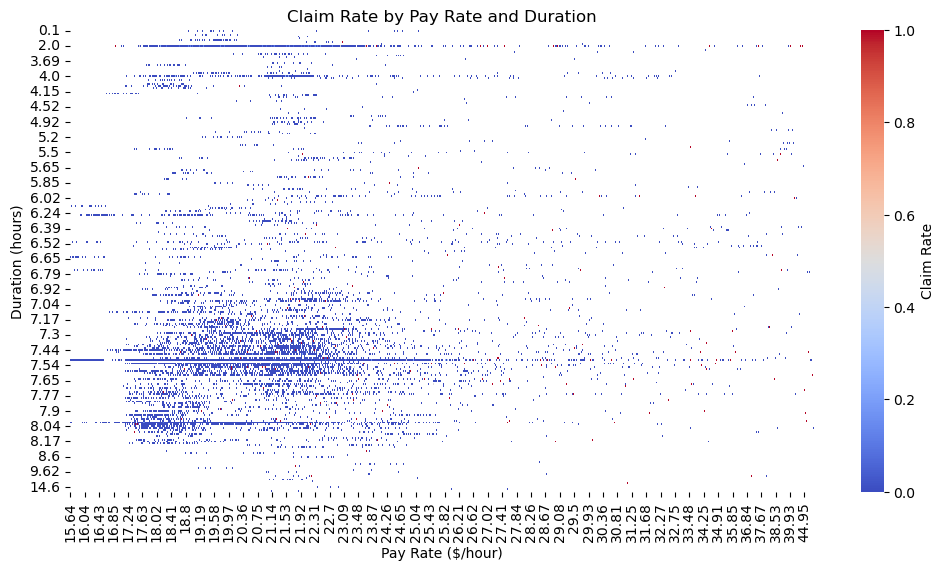

In [22]:
# Add a column to indicate whether a shift was claimed
clean_data['CLAIMED'] = ~clean_data['CLAIMED_AT'].isnull()

# Group by pay rate and duration to calculate claim rates
claim_rate_analysis = clean_data.groupby(['RATE', 'DURATION'])['CLAIMED'].mean().reset_index()

print("Claim Rate by Pay Rate and Duration:")
print(claim_rate_analysis.head())

# Visualize trends in pay rate and duration
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(
    claim_rate_analysis.pivot(index='DURATION', columns='RATE', values='CLAIMED'),
    cmap='coolwarm',
    annot=False,
    cbar_kws={'label': 'Claim Rate'},
)
plt.title('Claim Rate by Pay Rate and Duration')
plt.xlabel('Pay Rate ($/hour)')
plt.ylabel('Duration (hours)')
plt.show()

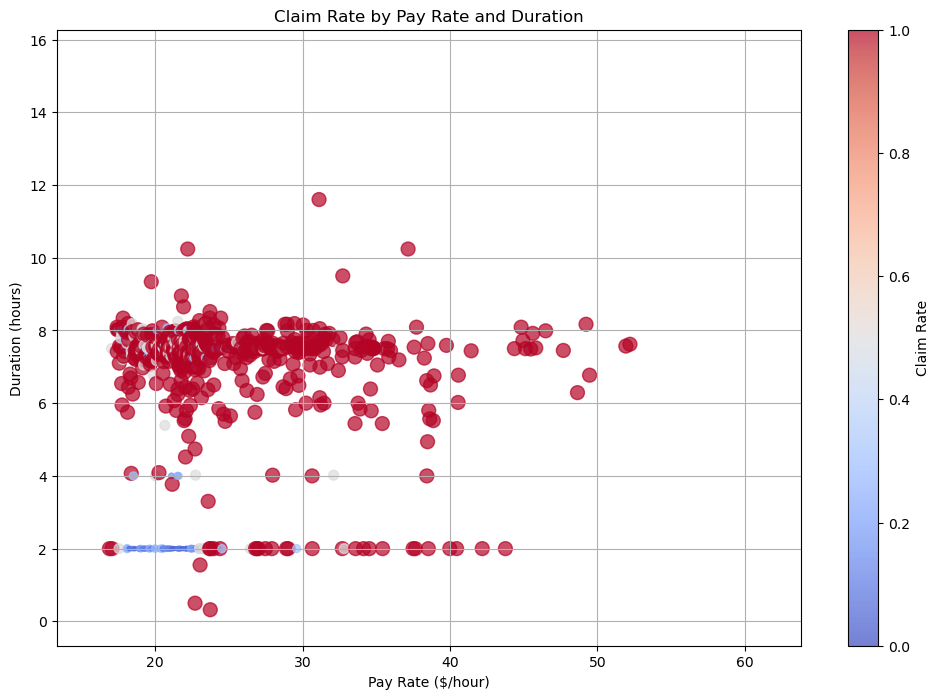

In [23]:
import matplotlib.pyplot as plt

# Group data to calculate average claim rate by rate and duration
scatter_data = clean_data.groupby(['RATE', 'DURATION'])['CLAIMED'].mean().reset_index()

# Create a scatter plot of pay rate vs. duration
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    scatter_data['RATE'], scatter_data['DURATION'],
    c=scatter_data['CLAIMED'], cmap='coolwarm', alpha=0.7,
    s=scatter_data['CLAIMED'] * 100  # Scale size of points by claim rate
)

# Add colorbar and labels
plt.colorbar(scatter, label='Claim Rate')
plt.title('Claim Rate by Pay Rate and Duration')
plt.xlabel('Pay Rate ($/hour)')
plt.ylabel('Duration (hours)')
plt.grid(True)
plt.show()

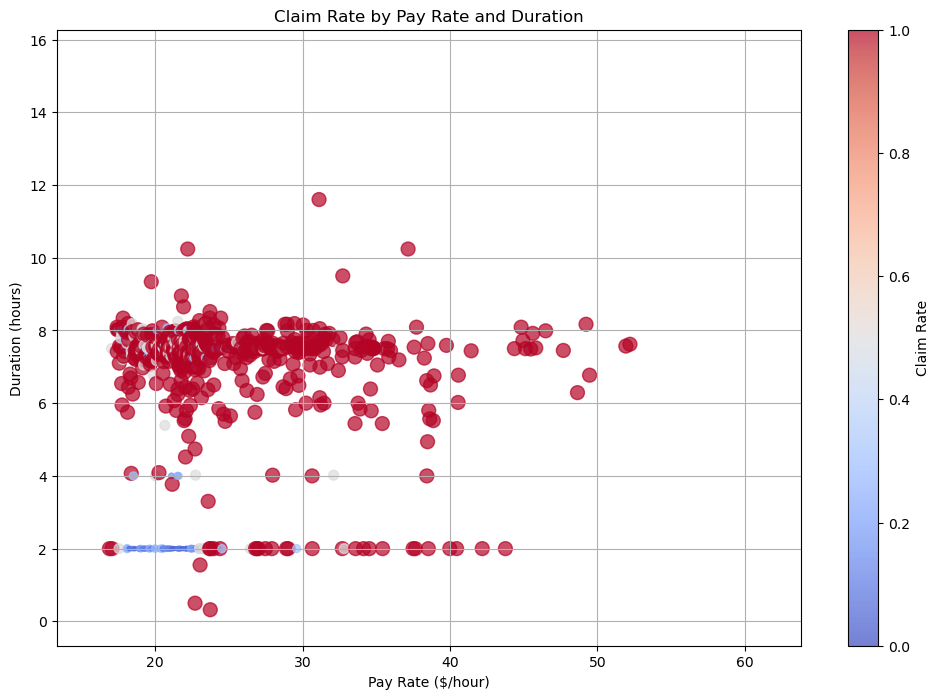

In [26]:
import matplotlib.pyplot as plt

# Group data to calculate average claim rate by rate and duration
scatter_data = clean_data.groupby(['RATE', 'DURATION'])['CLAIMED'].mean().reset_index()

# Create a scatter plot of pay rate vs. duration
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    scatter_data['RATE'], scatter_data['DURATION'],
    c=scatter_data['CLAIMED'], cmap='coolwarm', alpha=0.7,
    s=scatter_data['CLAIMED'] * 100  # Scale size of points by claim rate
)

# Add colorbar and labels
plt.colorbar(scatter, label='Claim Rate')
plt.title('Claim Rate by Pay Rate and Duration')
plt.xlabel('Pay Rate ($/hour)')
plt.ylabel('Duration (hours)')
plt.grid(True)
plt.show()

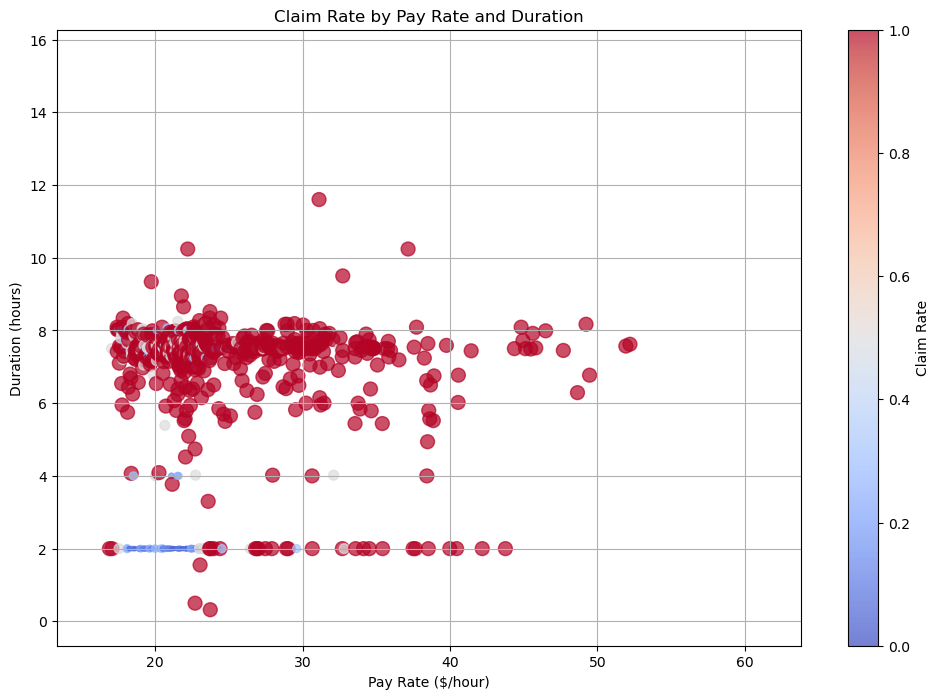

In [35]:
import matplotlib.pyplot as plt

# Group data to calculate average claim rate by rate and duration
scatter_data = clean_data.groupby(['RATE', 'DURATION'])['CLAIMED'].mean().reset_index()

# Create a scatter plot of pay rate vs. duration
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    scatter_data['RATE'], scatter_data['DURATION'],
    c=scatter_data['CLAIMED'], cmap='coolwarm', alpha=0.7,
    s=scatter_data['CLAIMED'] * 100  # Scale size of points by claim rate
)

# Add colorbar and labels
plt.colorbar(scatter, label='Claim Rate')
plt.title('Claim Rate by Pay Rate and Duration')
plt.xlabel('Pay Rate ($/hour)')
plt.ylabel('Duration (hours)')
plt.grid(True)
plt.show()

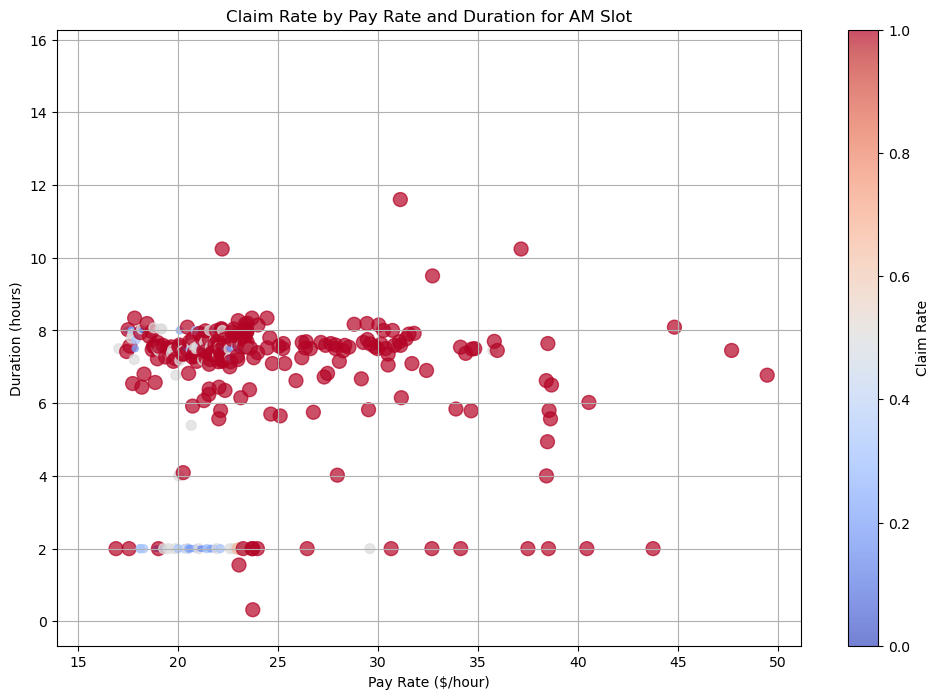

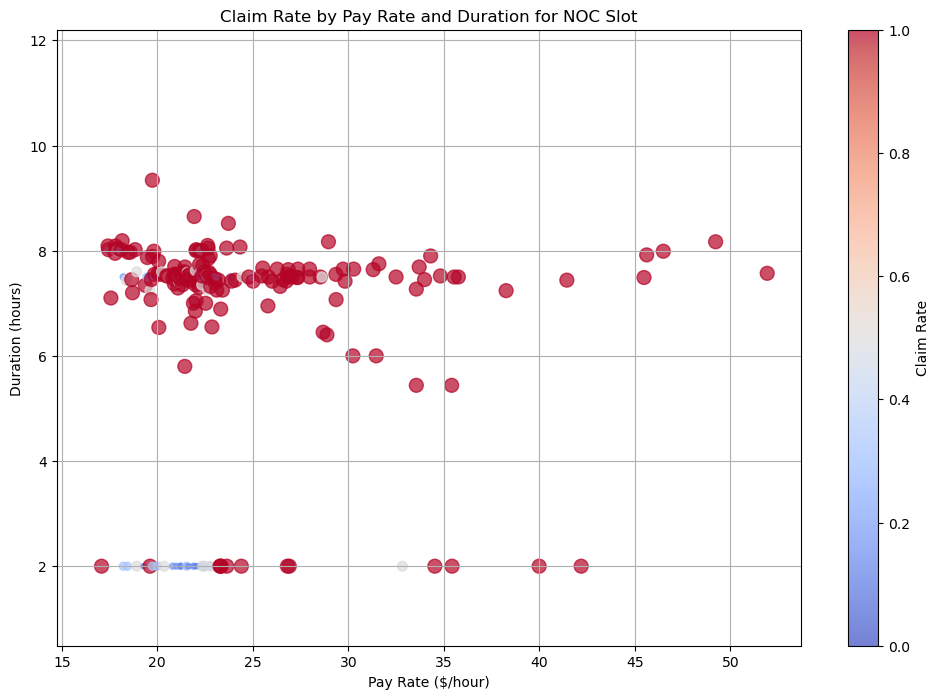

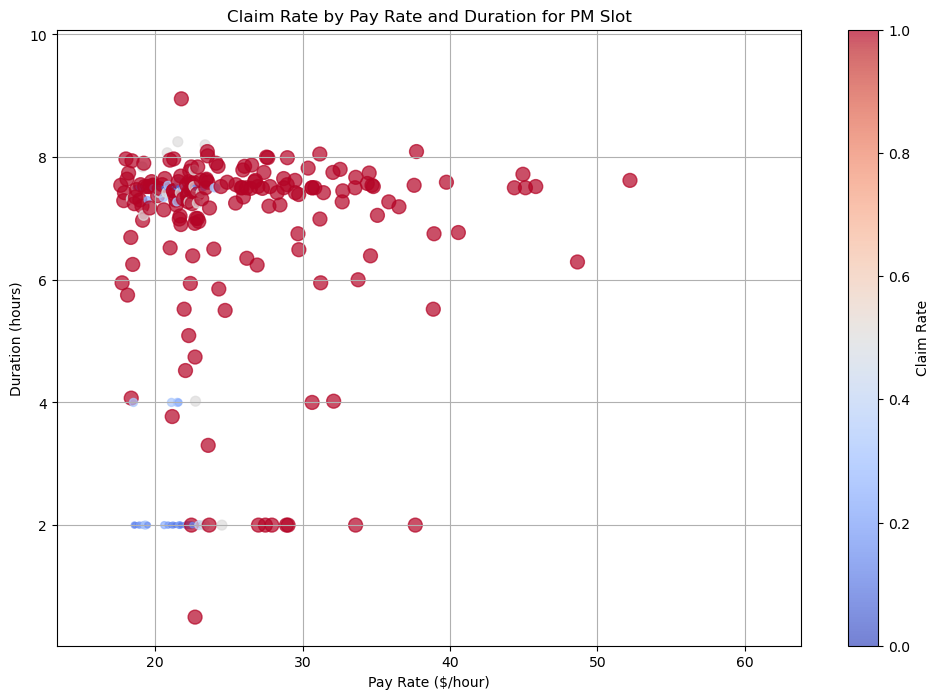

In [24]:
# Analyze slot-specific claim rates
slot_claim_rate = clean_data.groupby(['SLOT', 'RATE', 'DURATION'])['CLAIMED'].mean().reset_index()

for slot in slot_claim_rate['SLOT'].unique():
    slot_data = slot_claim_rate[slot_claim_rate['SLOT'] == slot]
    plt.figure(figsize=(12, 8))
    plt.scatter(
        slot_data['RATE'], slot_data['DURATION'],
        c=slot_data['CLAIMED'], cmap='coolwarm', alpha=0.7, s=slot_data['CLAIMED'] * 100
    )
    plt.colorbar(label='Claim Rate')
    plt.title(f'Claim Rate by Pay Rate and Duration for {slot.upper()} Slot')
    plt.xlabel('Pay Rate ($/hour)')
    plt.ylabel('Duration (hours)')
    plt.grid(True)
    plt.show()

In [25]:
# Summarize claim rates by ranges of pay rate and duration
clean_data['RATE_RANGE'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])
clean_data['DURATION_RANGE'] = pd.cut(clean_data['DURATION'], bins=[0, 5, 10, 15], labels=['Short', 'Medium', 'Long'])

rate_duration_claim_summary = clean_data.groupby(['RATE_RANGE', 'DURATION_RANGE'])['CLAIMED'].mean().unstack()
print(rate_duration_claim_summary)

DURATION_RANGE     Short    Medium      Long
RATE_RANGE                                  
Low             0.012277  0.007370  0.000000
Medium          0.019810  0.014927  0.020408
High            0.063636  0.069492  0.111111


/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/3168809109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['RATE_RANGE'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])
/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/3168809109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['DURATION_RANGE'] = pd.cut(clean_data['DURATION'], bins=[0, 5, 10, 15], labels=['Short', 'Medium', 'Long'])


In [26]:
# Categorize RATE and DURATION into ranges
clean_data['RATE_RANGE'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])
clean_data['DURATION_RANGE'] = pd.cut(clean_data['DURATION'], bins=[0, 5, 10, 15], labels=['Short', 'Medium', 'Long'])

# Summarize claim rates by SLOT, RATE_RANGE, and DURATION_RANGE
slot_summary = clean_data.groupby(['SLOT', 'RATE_RANGE', 'DURATION_RANGE'])['CLAIMED'].mean().unstack()

print("Claim Rate by SLOT, Pay Rate, and Duration Ranges:")
print(slot_summary)

Claim Rate by SLOT, Pay Rate, and Duration Ranges:
DURATION_RANGE      Short    Medium      Long
SLOT RATE_RANGE                              
am   Low         0.015660  0.006425       NaN
     Medium      0.024603  0.014878  0.041667
     High        0.058537  0.057021  0.117647
noc  Low         0.017316  0.012153  0.000000
     Medium      0.020084  0.019734  0.000000
     High        0.200000  0.091760  0.000000
pm   Low         0.007699  0.006410       NaN
     Medium      0.017148  0.012442       NaN
     High        0.045000  0.072527       NaN


/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/72425296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['RATE_RANGE'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])
/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/72425296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['DURATION_RANGE'] = pd.cut(clean_data['DURATION'], bins=[0, 5, 10, 15], labels=['Short', 'Medium', 'Long'])


/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/2481914228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['RATE_CATEGORY'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])


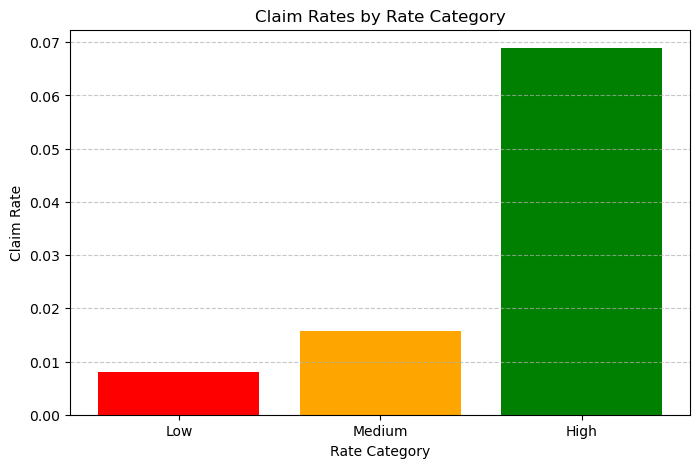

In [27]:
# Ensure RATE_CATEGORY and CLAIMED columns exist
clean_data['RATE_CATEGORY'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])

# Calculate claim rates by RATE_CATEGORY
claim_rate_by_rate_category = clean_data.groupby('RATE_CATEGORY')['CLAIMED'].mean().reset_index()
claim_rate_by_rate_category.columns = ['RATE_CATEGORY', 'CLAIM_RATE']

# Plot bar chart for claim rates
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(claim_rate_by_rate_category['RATE_CATEGORY'], claim_rate_by_rate_category['CLAIM_RATE'], color=['red', 'orange', 'green'])
plt.title('Claim Rates by Rate Category')
plt.xlabel('Rate Category')
plt.ylabel('Claim Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/799017675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['RATE_CATEGORY'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])
/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/799017675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['DURATION_CATEGORY'] = pd.cut(clean_data['DURATION'], bins=[0, 5, 10, 15], labels=['Short', 'Medium', 'Long'])


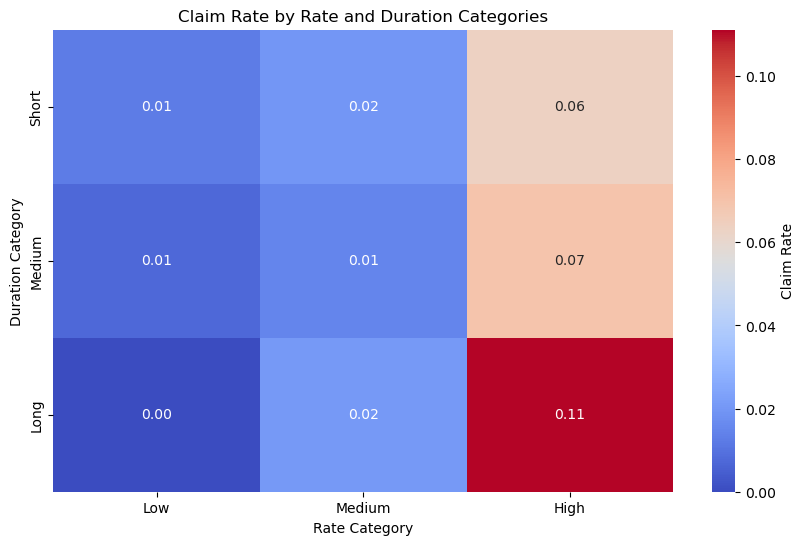

In [28]:
# Ensure RATE_CATEGORY and DURATION_CATEGORY columns exist
clean_data['RATE_CATEGORY'] = pd.cut(clean_data['RATE'], bins=[0, 20, 25, 50], labels=['Low', 'Medium', 'High'])
clean_data['DURATION_CATEGORY'] = pd.cut(clean_data['DURATION'], bins=[0, 5, 10, 15], labels=['Short', 'Medium', 'Long'])

# Group by RATE_CATEGORY and DURATION_CATEGORY to calculate claim rates
combined_rate_duration = clean_data.groupby(['RATE_CATEGORY', 'DURATION_CATEGORY'])['CLAIMED'].mean().reset_index()
combined_rate_duration.columns = ['RATE_CATEGORY', 'DURATION_CATEGORY', 'CLAIM_RATE']

# Pivot the data for heatmap visualization
pivot_data = combined_rate_duration.pivot(index='DURATION_CATEGORY', columns='RATE_CATEGORY', values='CLAIM_RATE')

# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Claim Rate'})
plt.title('Claim Rate by Rate and Duration Categories')
plt.xlabel('Rate Category')
plt.ylabel('Duration Category')
plt.show()

In [29]:
# Filter deleted shifts
deleted_shifts = clean_data[~clean_data['DELETED_AT'].isnull()]

# Calculate deletion rates by SLOT, RATE_CATEGORY, and DURATION_CATEGORY
deleted_rates_by_slot = deleted_shifts['SLOT'].value_counts(normalize=True) * 100
deleted_rates_by_rate = deleted_shifts['RATE_CATEGORY'].value_counts(normalize=True) * 100
deleted_rates_by_duration = deleted_shifts['DURATION_CATEGORY'].value_counts(normalize=True) * 100

# Calculate time-to-deletion
deleted_shifts['TIME_TO_DELETION'] = (deleted_shifts['DELETED_AT'] - deleted_shifts['SHIFT_CREATED_AT']).dt.total_seconds() / 3600  # in hours
time_to_deletion_stats = deleted_shifts['TIME_TO_DELETION'].describe()

# Print insights
print("Deletion Rates by SLOT:")
print(deleted_rates_by_slot)

print("\nDeletion Rates by RATE_CATEGORY:")
print(deleted_rates_by_rate)

print("\nDeletion Rates by DURATION_CATEGORY:")
print(deleted_rates_by_duration)

print("\nTime-to-Deletion Statistics (in hours):")
print(time_to_deletion_stats)

Deletion Rates by SLOT:
SLOT
pm     43.165775
am     37.746881
noc    19.087344
Name: proportion, dtype: float64

Deletion Rates by RATE_CATEGORY:
RATE_CATEGORY
Medium    65.789661
Low       31.714795
High       2.495544
Name: proportion, dtype: float64

Deletion Rates by DURATION_CATEGORY:
DURATION_CATEGORY
Medium    54.166072
Short     45.676987
Long       0.156941
Name: proportion, dtype: float64

Time-to-Deletion Statistics (in hours):
count    14025.000000
mean       389.337346
std        456.014216
min          0.004444
25%         40.439444
50%        238.293611
75%        647.994167
max       2281.859167
Name: TIME_TO_DELETION, dtype: float64


/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/3530236986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deleted_shifts['TIME_TO_DELETION'] = (deleted_shifts['DELETED_AT'] - deleted_shifts['SHIFT_CREATED_AT']).dt.total_seconds() / 3600  # in hours


In [30]:
# Filter canceled shifts
canceled_shifts = clean_data[~clean_data['CANCELED_AT'].isnull()]

# Calculate cancellation rates by SLOT, RATE_CATEGORY, and DURATION_CATEGORY
canceled_rates_by_slot = canceled_shifts['SLOT'].value_counts(normalize=True) * 100
canceled_rates_by_rate = canceled_shifts['RATE_CATEGORY'].value_counts(normalize=True) * 100
canceled_rates_by_duration = canceled_shifts['DURATION_CATEGORY'].value_counts(normalize=True) * 100

# Calculate time-to-cancellation
canceled_shifts['TIME_TO_CANCELLATION'] = (canceled_shifts['CANCELED_AT'] - canceled_shifts['CLAIMED_AT']).dt.total_seconds() / 3600  # in hours
time_to_cancellation_stats = canceled_shifts['TIME_TO_CANCELLATION'].describe()

# Print insights
print("Cancellation Rates by SLOT:")
print(canceled_rates_by_slot)

print("\nCancellation Rates by RATE_CATEGORY:")
print(canceled_rates_by_rate)

print("\nCancellation Rates by DURATION_CATEGORY:")
print(canceled_rates_by_duration)

print("\nTime-to-Cancellation Statistics (in hours):")
print(time_to_cancellation_stats)

Cancellation Rates by SLOT:
SLOT
pm     37.5
am     37.5
noc    25.0
Name: proportion, dtype: float64

Cancellation Rates by RATE_CATEGORY:
RATE_CATEGORY
Medium    60.294118
Low       22.794118
High      16.911765
Name: proportion, dtype: float64

Cancellation Rates by DURATION_CATEGORY:
DURATION_CATEGORY
Medium    78.676471
Short     21.323529
Long       0.000000
Name: proportion, dtype: float64

Time-to-Cancellation Statistics (in hours):
count     136.000000
mean      139.396013
std       257.252561
min         0.003611
25%         0.430625
50%        49.031667
75%       131.127708
max      1422.577778
Name: TIME_TO_CANCELLATION, dtype: float64


/var/folders/6g/9_rtgwc16kq0vxq3xkt1ln500000gn/T/ipykernel_56534/3748918819.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_shifts['TIME_TO_CANCELLATION'] = (canceled_shifts['CANCELED_AT'] - canceled_shifts['CLAIMED_AT']).dt.total_seconds() / 3600  # in hours


In [31]:
# Filter unclaimed shifts
unclaimed_shifts = clean_data[clean_data['CLAIMED_AT'].isnull()]

# Calculate unclaimed rates by SLOT, RATE_CATEGORY, and DURATION_CATEGORY
unclaimed_rates_by_slot = unclaimed_shifts['SLOT'].value_counts(normalize=True) * 100
unclaimed_rates_by_rate = unclaimed_shifts['RATE_CATEGORY'].value_counts(normalize=True) * 100
unclaimed_rates_by_duration = unclaimed_shifts['DURATION_CATEGORY'].value_counts(normalize=True) * 100

# Print insights
print("Unclaimed Rates by SLOT:")
print(unclaimed_rates_by_slot)

print("\nUnclaimed Rates by RATE_CATEGORY:")
print(unclaimed_rates_by_rate)

print("\nUnclaimed Rates by DURATION_CATEGORY:")
print(unclaimed_rates_by_duration)

Unclaimed Rates by SLOT:
SLOT
am     41.461997
pm     39.155438
noc    19.382565
Name: proportion, dtype: float64

Unclaimed Rates by RATE_CATEGORY:
RATE_CATEGORY
Medium    56.153064
Low       37.898387
High       5.948550
Name: proportion, dtype: float64

Unclaimed Rates by DURATION_CATEGORY:
DURATION_CATEGORY
Medium    83.968023
Short     15.897010
Long       0.134967
Name: proportion, dtype: float64


In [32]:
# Total shifts (from the cleaned dataset)
total_shifts = len(clean_data)

# Total unclaimed shifts
total_unclaimed_shifts = len(clean_data[clean_data['CLAIMED_AT'].isnull()])

# Calculate percentage
total_unclaimed_percentage = (total_unclaimed_shifts / total_shifts) * 100

# Output the result
print(f"Total Percentage of Unclaimed Shifts: {total_unclaimed_percentage:.2f}%")

Total Percentage of Unclaimed Shifts: 98.37%


In [33]:
# Percentage of unclaimed shifts by SLOT
unclaimed_percentage_by_slot = (unclaimed_shifts['SLOT'].value_counts() / clean_data['SLOT'].value_counts()) * 100

# Percentage of unclaimed shifts by RATE_CATEGORY
unclaimed_percentage_by_rate = (unclaimed_shifts['RATE_CATEGORY'].value_counts() / clean_data['RATE_CATEGORY'].value_counts()) * 100

# Percentage of unclaimed shifts by DURATION_CATEGORY
unclaimed_percentage_by_duration = (unclaimed_shifts['DURATION_CATEGORY'].value_counts() / clean_data['DURATION_CATEGORY'].value_counts()) * 100

# Print the results
print("Percentage of Unclaimed Shifts by SLOT:")
print(unclaimed_percentage_by_slot)

print("\nPercentage of Unclaimed Shifts by RATE_CATEGORY:")
print(unclaimed_percentage_by_rate)

print("\nPercentage of Unclaimed Shifts by DURATION_CATEGORY:")
print(unclaimed_percentage_by_duration)

Percentage of Unclaimed Shifts by SLOT:
SLOT
am     98.466621
pm     98.578298
noc    97.769400
Name: count, dtype: float64

Percentage of Unclaimed Shifts by RATE_CATEGORY:
RATE_CATEGORY
Medium    98.420612
Low       99.195696
High      93.110172
Name: count, dtype: float64

Percentage of Unclaimed Shifts by DURATION_CATEGORY:
DURATION_CATEGORY
Medium    98.446819
Short     98.015619
Long      95.588235
Name: count, dtype: float64


In [36]:
# Calculate claim rates by WORKPLACE_ID
claim_rate_by_hospital = clean_data.groupby('WORKPLACE_ID')['CLAIMED'].mean().reset_index()

# Sort by highest claim rate
claim_rate_by_hospital = claim_rate_by_hospital.sort_values(by='CLAIMED', ascending=False)

# Rename columns for clarity
claim_rate_by_hospital.columns = ['WORKPLACE_ID', 'CLAIM_RATE']

# Display the top hospitals with the highest claim rates
print("Top 10 Hospitals with the Highest Claim Rates:")
print(claim_rate_by_hospital.head(10))


Top 10 Hospitals with the Highest Claim Rates:
                 WORKPLACE_ID  CLAIM_RATE
48   5ff22ac26196760016a74a2c         1.0
89   62e037db85ff4b01b8e6f34c         1.0
46   5fedbd0b393d540016bb7592         1.0
50   5ff247616749b800163546a2         1.0
137  65973d353dc8e59248a0f2a6         1.0
104  63c194e1151e0301b4fbb451         1.0
90   62e03d9b3425fd01b6eb2767         1.0
62   611d39973de89b016640aee7         1.0
82   62bdbca89e194101c0e2913c         1.0
123  646288978d4f0801b87c593d         1.0


In [38]:
# Count the number of shifts posted by each hospital with the best claim rates
top_hospitals = clean_data[clean_data['WORKPLACE_ID'].isin(claim_rate_by_hospital.head(100)['WORKPLACE_ID'])]
top_hospital_post_counts = top_hospitals.groupby('WORKPLACE_ID').size().reset_index(name='SHIFT_COUNT')

# Merge the shift counts with claim rates
top_100_claim_rates = claim_rate_by_hospital.head(100).merge(
    top_hospital_post_counts, on='WORKPLACE_ID', how='left'
)

# Display the top 100 hospitals with their claim rates and number of shifts
print("Top 100 Hospitals with Best Claim Rates and Their Shift Counts:")
print(top_100_claim_rates)



Top 100 Hospitals with Best Claim Rates and Their Shift Counts:
                WORKPLACE_ID  CLAIM_RATE  SHIFT_COUNT
0   5ff22ac26196760016a74a2c    1.000000            1
1   62e037db85ff4b01b8e6f34c    1.000000            2
2   5fedbd0b393d540016bb7592    1.000000            1
3   5ff247616749b800163546a2    1.000000            1
4   65973d353dc8e59248a0f2a6    1.000000            1
..                       ...         ...          ...
95  5d0c1a3f605685001689aa4f    0.011236           89
96  6058de755ad75600168a3ae7    0.011080         2166
97  5c4fc84d774ed70016dfcb1b    0.010668         3937
98  6616dd6e3cdf6f30e2d608e5    0.010395          481
99  6671cce47e8fec05eccb3be8    0.009913          807

[100 rows x 3 columns]


In [39]:
# Set pandas display option to show all rows
import pandas as pd
pd.set_option('display.max_rows', 100)  # Adjust to desired number of rows

# Display the full top 100 list
print("Top 100 Hospitals with Best Claim Rates and Their Shift Counts:")
print(top_100_claim_rates)

# Reset display settings to default if needed later
pd.reset_option('display.max_rows')


Top 100 Hospitals with Best Claim Rates and Their Shift Counts:
                WORKPLACE_ID  CLAIM_RATE  SHIFT_COUNT
0   5ff22ac26196760016a74a2c    1.000000            1
1   62e037db85ff4b01b8e6f34c    1.000000            2
2   5fedbd0b393d540016bb7592    1.000000            1
3   5ff247616749b800163546a2    1.000000            1
4   65973d353dc8e59248a0f2a6    1.000000            1
5   63c194e1151e0301b4fbb451    1.000000            1
6   62e03d9b3425fd01b6eb2767    1.000000            1
7   611d39973de89b016640aee7    1.000000            1
8   62bdbca89e194101c0e2913c    1.000000            1
9   646288978d4f0801b87c593d    1.000000            1
10  640f2cf2e95a8101c23b549f    0.625000            8
11  63dc0e890fde8f01b8d9550f    0.500000            4
12  64e3c9efe55f054bfc02bb0f    0.500000            4
13  658596b2d4347836ffba39f2    0.333333            6
14  63a4ade4655c3b01b5b2c83a    0.307692           13
15  641cc7f1cac25e01c3671b57    0.250000           12
16  5ff246b4619676

In [40]:
# Filter top-performing hospitals (e.g., CLAIM_RATE = 1.0)
high_performing_hospitals = top_100_claim_rates[top_100_claim_rates['CLAIM_RATE'] == 1.0]['WORKPLACE_ID']

# Filter the main dataset for these high-performing hospitals
high_perf_data = clean_data[clean_data['WORKPLACE_ID'].isin(high_performing_hospitals)]

# Analyze key factors: RATE, DURATION, SLOT, and CATEGORY distributions
high_perf_rate_dist = high_perf_data['RATE_CATEGORY'].value_counts(normalize=True) * 100
high_perf_duration_dist = high_perf_data['DURATION_CATEGORY'].value_counts(normalize=True) * 100
high_perf_slot_dist = high_perf_data['SLOT'].value_counts(normalize=True) * 100

# Summary statistics for pay rates and durations in high-performing hospitals
high_perf_rate_stats = high_perf_data['RATE'].describe()
high_perf_duration_stats = high_perf_data['DURATION'].describe()

# Print distributions
print("Rate Category Distribution (%):")
print(high_perf_rate_dist)

print("\nDuration Category Distribution (%):")
print(high_perf_duration_dist)

print("\nSlot Distribution (%):")
print(high_perf_slot_dist)

# Print summary statistics
print("\nSummary Statistics for Pay Rates:")
print(high_perf_rate_stats)

print("\nSummary Statistics for Durations:")
print(high_perf_duration_stats)


Rate Category Distribution (%):
RATE_CATEGORY
High      90.909091
Medium     9.090909
Low        0.000000
Name: proportion, dtype: float64

Duration Category Distribution (%):
DURATION_CATEGORY
Medium    81.818182
Short      9.090909
Long       9.090909
Name: proportion, dtype: float64

Slot Distribution (%):
SLOT
am     45.454545
noc    36.363636
pm     18.181818
Name: proportion, dtype: float64

Summary Statistics for Pay Rates:
count    11.000000
mean     31.740909
std       6.507329
min      24.640000
25%      27.435000
50%      31.120000
75%      33.145000
max      48.650000
Name: RATE, dtype: float64

Summary Statistics for Durations:
count    11.000000
mean      7.245455
std       2.357288
min       2.000000
25%       6.680000
50%       7.270000
75%       7.785000
max      11.600000
Name: DURATION, dtype: float64


In [41]:
# Filter hospitals with CLAIM_RATE >= 0.05 (5% claim rate cutoff)
top_39_hospitals = top_100_claim_rates[top_100_claim_rates['CLAIM_RATE'] >= 0.05]['WORKPLACE_ID']

# Filter the main dataset for these top-performing hospitals
top_39_data = clean_data[clean_data['WORKPLACE_ID'].isin(top_39_hospitals)]

# Analyze key factors: RATE, DURATION, SLOT, and CATEGORY distributions
top_39_rate_dist = top_39_data['RATE_CATEGORY'].value_counts(normalize=True) * 100
top_39_duration_dist = top_39_data['DURATION_CATEGORY'].value_counts(normalize=True) * 100
top_39_slot_dist = top_39_data['SLOT'].value_counts(normalize=True) * 100

# Summary statistics for pay rates and durations in the top 39 hospitals
top_39_rate_stats = top_39_data['RATE'].describe()
top_39_duration_stats = top_39_data['DURATION'].describe()

# Print distributions
print("Rate Category Distribution (%):")
print(top_39_rate_dist)

print("\nDuration Category Distribution (%):")
print(top_39_duration_dist)

print("\nSlot Distribution (%):")
print(top_39_slot_dist)

# Print summary statistics
print("\nSummary Statistics for Pay Rates:")
print(top_39_rate_stats)

print("\nSummary Statistics for Durations:")
print(top_39_duration_stats)


Rate Category Distribution (%):
RATE_CATEGORY
Medium    76.74113
High      18.26544
Low        4.99343
Name: proportion, dtype: float64

Duration Category Distribution (%):
DURATION_CATEGORY
Medium    90.078844
Short      9.461235
Long       0.459921
Name: proportion, dtype: float64

Slot Distribution (%):
SLOT
am     54.796321
pm     27.660972
noc    17.542707
Name: proportion, dtype: float64

Summary Statistics for Pay Rates:
count    1522.000000
mean       23.326932
std         3.826418
min        16.930000
25%        21.342500
50%        22.320000
75%        23.487500
max        49.230000
Name: RATE, dtype: float64

Summary Statistics for Durations:
count    1522.000000
mean        7.012221
std         1.730330
min         0.500000
25%         7.150000
50%         7.500000
75%         7.765000
max        14.600000
Name: DURATION, dtype: float64


In [42]:
# Identify the top users (workers) by number of claimed gigs
top_users = clean_data[~clean_data['CLAIMED_AT'].isnull()]  # Filter only claimed shifts
top_users_counts = top_users['WORKER_ID'].value_counts().reset_index()
top_users_counts.columns = ['WORKER_ID', 'CLAIMED_COUNT']

# Filter the main dataset for these top workers
top_users_data = clean_data[clean_data['WORKER_ID'].isin(top_users_counts.head(10)['WORKER_ID'])]

# Analyze key factors for these top workers
top_users_rate_dist = top_users_data['RATE_CATEGORY'].value_counts(normalize=True) * 100
top_users_duration_dist = top_users_data['DURATION_CATEGORY'].value_counts(normalize=True) * 100
top_users_slot_dist = top_users_data['SLOT'].value_counts(normalize=True) * 100

# Summary statistics for pay rates and durations for these top workers
top_users_rate_stats = top_users_data['RATE'].describe()
top_users_duration_stats = top_users_data['DURATION'].describe()

# Print insights
print("Top 10 Workers by Claimed Shifts:")
print(top_users_counts.head(10))

print("\nRate Category Distribution for Top Workers (%):")
print(top_users_rate_dist)

print("\nDuration Category Distribution for Top Workers (%):")
print(top_users_duration_dist)

print("\nSlot Distribution for Top Workers (%):")
print(top_users_slot_dist)

print("\nSummary Statistics for Pay Rates for Top Workers:")
print(top_users_rate_stats)

print("\nSummary Statistics for Durations for Top Workers:")
print(top_users_duration_stats)


Top 10 Workers by Claimed Shifts:
                  WORKER_ID  CLAIMED_COUNT
0  666f302053f8a9d7f322b132              6
1  615fa47ed4db32016ae9f3d5              5
2  642f7accd16cc8d40b683f9c              5
3  64fbbe54be202a3a2eea7c24              5
4  6362c3357ccb0c3b06cff853              5
5  66be677393d8c271686ea99c              5
6  61ca1435c53233018bed3874              5
7  637d87293540dfe4c26fd135              5
8  63e0871a08d1f56324ea6e8b              4
9  6583520327861cb389d95741              4

Rate Category Distribution for Top Workers (%):
RATE_CATEGORY
Medium    68.835616
Low       25.684932
High       5.479452
Name: proportion, dtype: float64

Duration Category Distribution for Top Workers (%):
DURATION_CATEGORY
Medium    71.917808
Short     28.082192
Long       0.000000
Name: proportion, dtype: float64

Slot Distribution for Top Workers (%):
SLOT
pm     39.041096
am     34.589041
noc    26.369863
Name: proportion, dtype: float64

Summary Statistics for Pay Rates for Top Wo

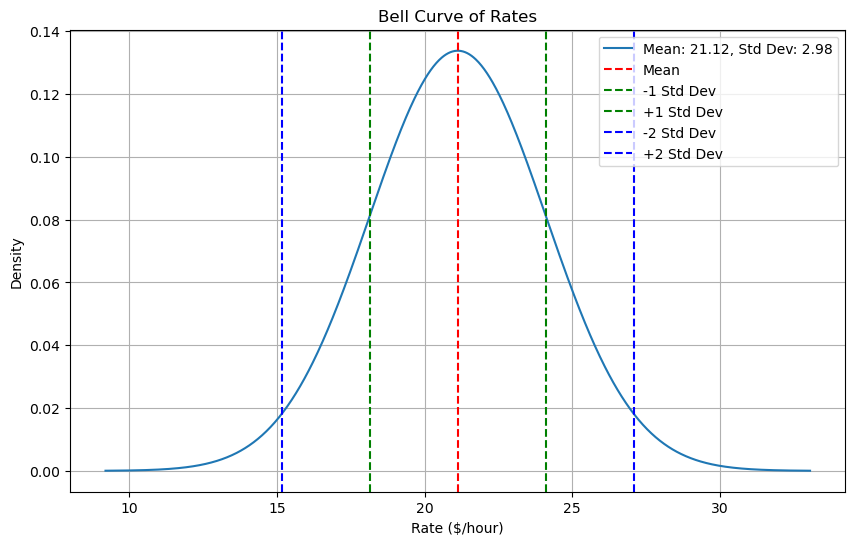

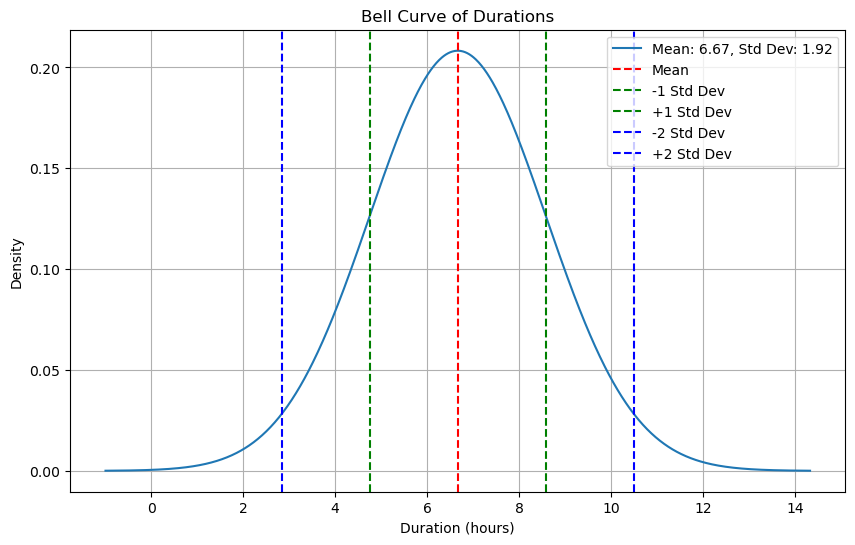

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to plot bell curve
def plot_bell_curve(data, column_name, title, x_label):
    # Calculate mean and standard deviation
    mean = data[column_name].mean()
    std = data[column_name].std()

    # Generate a range of values
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    y = norm.pdf(x, mean, std)

    # Plot the bell curve
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"Mean: {mean:.2f}, Std Dev: {std:.2f}")
    plt.axvline(mean, color='r', linestyle='--', label="Mean")
    plt.axvline(mean - std, color='g', linestyle='--', label="-1 Std Dev")
    plt.axvline(mean + std, color='g', linestyle='--', label="+1 Std Dev")
    plt.axvline(mean - 2*std, color='b', linestyle='--', label="-2 Std Dev")
    plt.axvline(mean + 2*std, color='b', linestyle='--', label="+2 Std Dev")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Density")
    plt.legend()
    plt.grid()
    plt.show()

# Plot bell curve for RATE
plot_bell_curve(clean_data, 'RATE', "Bell Curve of Rates", "Rate ($/hour)")

# Plot bell curve for DURATION
plot_bell_curve(clean_data, 'DURATION', "Bell Curve of Durations", "Duration (hours)")


In [44]:
# Identify key date columns
date_columns = ['SHIFT_START_AT', 'SHIFT_CREATED_AT', 'OFFER_VIEWED_AT', 'CLAIMED_AT', 'CANCELED_AT', 'DELETED_AT']

# Find the min and max dates for each column
date_ranges = clean_data[date_columns].agg(['min', 'max'])

# Display the date ranges
print("Date Ranges of Key Columns:")
print(date_ranges)



Date Ranges of Key Columns:
         SHIFT_START_AT    SHIFT_CREATED_AT     OFFER_VIEWED_AT  \
min 2024-09-27 00:00:00 2024-06-22 14:13:26 2024-07-09 13:39:56   
max 2024-10-03 23:00:00 2024-10-03 21:58:59 2024-10-03 22:03:51   

             CLAIMED_AT         CANCELED_AT          DELETED_AT  
min 2024-07-17 20:07:51 2024-08-22 23:52:40 2024-08-07 19:10:03  
max 2024-10-03 19:30:18 2024-10-03 17:55:59 2024-10-03 22:30:29  


In [45]:
# Filter rows where offers were viewed
viewed_offers = clean_data[~clean_data['OFFER_VIEWED_AT'].isnull()]

# Total offers and percentage viewed
total_offers = len(clean_data)
viewed_offer_count = len(viewed_offers)
percentage_viewed = (viewed_offer_count / total_offers) * 100

# Analyze viewed offers by RATE_CATEGORY, SLOT, and DURATION_CATEGORY
viewed_rate_dist = viewed_offers['RATE_CATEGORY'].value_counts(normalize=True) * 100
viewed_slot_dist = viewed_offers['SLOT'].value_counts(normalize=True) * 100
viewed_duration_dist = viewed_offers['DURATION_CATEGORY'].value_counts(normalize=True) * 100

# Summary statistics for time between SHIFT_CREATED_AT and OFFER_VIEWED_AT
viewed_offers['TIME_TO_VIEW'] = (viewed_offers['OFFER_VIEWED_AT'] - viewed_offers['SHIFT_CREATED_AT']).dt.total_seconds() / 3600  # in hours
time_to_view_stats = viewed_offers['TIME_TO_VIEW'].describe()

# Print insights
print("Total Offers:", total_offers)
print("Viewed Offers Count:", viewed_offer_count)
print(f"Percentage Viewed: {percentage_viewed:.2f}%")

print("\nRate Category Distribution for Viewed Offers (%):")
print(viewed_rate_dist)

print("\nSlot Distribution for Viewed Offers (%):")
print(viewed_slot_dist)

print("\nDuration Category Distribution for Viewed Offers (%):")
print(viewed_duration_dist)

print("\nTime to View Statistics (in hours):")
print(time_to_view_stats)


Total Offers: 48963
Viewed Offers Count: 48963
Percentage Viewed: 100.00%

Rate Category Distribution for Viewed Offers (%):
RATE_CATEGORY
Medium    56.128848
Low       37.586045
High       6.285107
Name: proportion, dtype: float64

Slot Distribution for Viewed Offers (%):
SLOT
am     41.423115
pm     39.074403
noc    19.502481
Name: proportion, dtype: float64

Duration Category Distribution for Viewed Offers (%):
DURATION_CATEGORY
Medium    83.905956
Short     15.955143
Long       0.138900
Name: proportion, dtype: float64

Time to View Statistics (in hours):
count    48963.000000
mean       210.828631
std        317.468654
min          0.000278
25%          5.985417
50%         48.596944
75%        303.059444
max       2252.175000
Name: TIME_TO_VIEW, dtype: float64
